<h1> Electronic Fund Transactions (EFT) Raw Data

In [1]:
import piplite
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h3> Load dataset

In [50]:
df=pd.read_csv("raw_eft_data.csv")

<h3> Summarize dataset

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137067 entries, 0 to 137066
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   CIF                     137067 non-null  category      
 1   EFFECTIVE_DATE          137067 non-null  datetime64[ns]
 2   TRANSACTION_AMOUNT      137067 non-null  float64       
 3   TRANSACTION_CODE        137067 non-null  object        
 4   TRANSACTION_DECRIPTION  137067 non-null  object        
 5   TIME_SEQ                137067 non-null  object        
 6   ABS_TRANSACTION_AMT     137067 non-null  float64       
 7   Month-Year              137067 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(2), object(4)
memory usage: 6.9+ MB


In [6]:
#Check for missing values
df.isnull().sum()/len(df)*100

CIF                       0.0
EFFECTIVE_DATE            0.0
TRANSACTION_AMOUNT        0.0
TRANSACTION_CODE          0.0
TRANSACTION_DECRIPTION    0.0
TIME_SEQ                  0.0
dtype: float64

In [7]:
#check for duplicate rows
df.duplicated().sum()

0

<h3> Change datatype

In [51]:
df['CIF']=df['CIF'].astype('category')

In [52]:
df['ABS_TRANSACTION_AMT']= df['TRANSACTION_AMOUNT'].abs()

In [53]:
df['EFFECTIVE_DATE']= pd.to_datetime(df['EFFECTIVE_DATE'])
df['TIME_SEQ']= pd.to_datetime(df['TIME_SEQ'])

In [13]:
pd.options.display.float_format='{:.2f}'.format
df.describe(exclude='number')
df.describe()

<ipython-input-13-c7e22ff2be51>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(exclude='number')
<ipython-input-13-c7e22ff2be51>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(exclude='number')


,TRANSACTION_AMOUNT,ABS_TRANSACTION_AMT
count,137067.00,137067.00
mean,22217.59,132627.92
std,1303790.62,1297217.52
min,-128355447.30,0.01
25%,-1000.00,93.68
50%,-0.17,1000.00
75%,1000.00,25930.70
max,122530540.50,128355447.30


In [21]:
#df1.head(20)

,CIF,EFFECTIVE_DATE,TRANSACTION_AMOUNT,TRANSACTION_CODE,TRANSACTION_DECRIPTION,TIME_SEQ,ABS_TRANSACTION_AMOUNT,TIMESTAMP
0,0,17-Jan-20,50.000000,CM,Credit Memo,18:20:04,50.000000,2020-01-17 18:20:04
1,0,17-Jan-20,50.000000,CM,Credit Memo,18:28:53,50.000000,2020-01-17 18:28:53
2,0,17-Jan-20,50.000000,CM,Credit Memo,18:43:04,50.000000,2020-01-17 18:43:04
3,0,18-Feb-20,82328.550000,CM,Deposit,8:28:43,82328.550000,2020-02-18 08:28:43
4,0,21-Feb-20,3265.290000,CM,Credit Memo,8:23:19,3265.290000,2020-02-21 08:23:19
5,0,26-Feb-20,100.000000,DM,REV Elect. Funds Transfer,14:45:17,100.000000,2020-02-26 14:45:17
6,0,1-Jun-20,160000.000000,CM,Deposit,9:19:54,160000.000000,2020-06-01 09:19:54
7,0,1-Jun-20,39000.000000,CM,Deposit,9:43:34,39000.000000,2020-06-01 09:43:34
8,55713,21-Oct-19,-34.810000,DM,Funds Wired to/from,13:02:44,34.810000,2019-10-21 13:02:44
9,55713,10-Jan-20,-35.760000,DM,Funds Wired to/from,14:46:15,35.760000,2020-01-10 14:46:15


<h2> Exploratory Data Analysis

<h3> Visual # 1 - Distribution of Transaction Amount

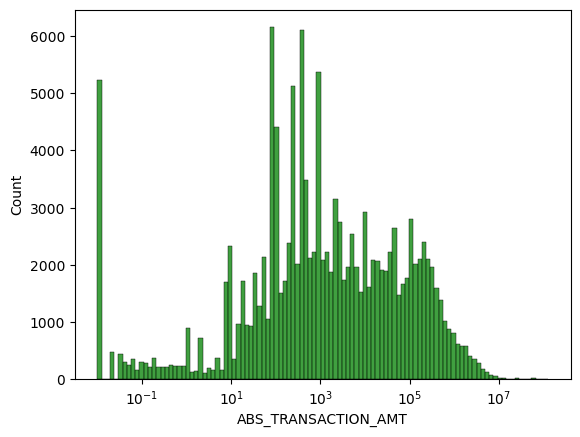

In [9]:
#distribution of transaction amount
sns.histplot(df['ABS_TRANSACTION_AMT'],log_scale=True,color="green")
plt.show()

<h3> Visual # 2 Boxplot of Transaction Amount

In [ ]:
sns.boxplot(y=df['ABS_TRANSACTION_AMT'])
plt.show()
sns.boxplot(y=df['ABS_TRANSACTION_AMT'],showfliers=False)
plt.show()

In [ ]:
sns.boxplot(data=df,x="TRANSACTION_CODE",y="ABS_TRANSACTION_AMT")
plt.show()
sns.boxplot(data=df,x="TRANSACTION_CODE",y="ABS_TRANSACTION_AMT",showfliers=False)
plt.show()

<h3> Visual # 3 Top Clients

In [29]:
#no of transactions per client
topcustomer_count=df.groupby('CIF')['ABS_TRANSACTION_AMT'].count().sort_values(ascending=False).reset_index()
topcustomer_rank=topcustomer_count.head(10)
topcustomer_rank

,CIF,ABS_TRANSACTION_AMT
0,2055038,10113
1,2168620,3625
2,2352544,2682
3,3253548,1932
4,2274624,757
5,2381513,755
6,2320346,755
7,2320037,754
8,2334825,730
9,2401876,694


In [12]:
#amount per client
topcustomer_amt=df.groupby('CIF')['ABS_TRANSACTION_AMT'].sum().sort_values(ascending=False).reset_index()
topcustomer_amt_rank=topcustomer_amt.head(10)
topcustomer_amt_rank

,CIF,ABS_TRANSACTION_AMT
0,2521514,2262104176
1,2168620,1619812748
2,2352544,1169467443
3,3253548,1169302104
4,2381513,908716212
5,2320346,866401405
6,2320037,679793292
7,2976410,663410662
8,2616067,634700000
9,2389895,608915566


In [ ]:
sns.barplot(data=topcustomer_amt_rank,x="ABS_TRANSACTION_AMT",y="CIF")
plt.xlabel("TRANSACTION AMOUNT")
plt.ylabel("CLIENT ID")
plt.show()
topcustomer_type_amt=df.groupby('TRANSACTION_DECRIPTION')['ABS_TRANSACTION_AMT'].sum().sort_values(ascending=False).reset_index()


In [20]:
top10_count=topcustomer_type.loc[11:]
top10_count

,TRANSACTION_DECRIPTION,ABS_TRANSACTION_AMT
11,REV Elect. Funds Transfer,4147
12,ABM Adjustment,4005
13,U.S. Wire Transfer,3915
14,REV Misc Service Charge,3710
15,Rev. Bill Payment,3658
...,...,...
123,REV One Account Payment,1
124,Refund of Legal Fees,1
125,REV Promo Interest Deposit,1
126,REV Reverse Bank Confirmation,1


In [42]:
sum(df['ABS_TRANSACTION_AMT'])

18178911600.741096

In [178]:
topcustomer_type=df.groupby('TRANSACTION_DECRIPTION')['ABS_TRANSACTION_AMT'].count().sort_values(ascending=False).reset_index()
others_count=pd.DataFrame(data={'TRANSACTION_DECRIPTION': ['Others'],'ABS_TRANSACTION_AMT':[topcustomer_type.loc[7:,'ABS_TRANSACTION_AMT'].sum()]})
topcustomer_type=pd.concat([topcustomer_type.loc[:6],others_count],ignore_index=True)
topcustomer_type_amt=df.groupby('TRANSACTION_DECRIPTION')['ABS_TRANSACTION_AMT'].sum().sort_values(ascending=False).reset_index()
others_counta=pd.DataFrame(data={'TRANSACTION_DECRIPTION': ['Others'],'ABS_TRANSACTION_AMT':[topcustomer_type_amt.loc[7:,'ABS_TRANSACTION_AMT'].sum()]})
topcustomer_type_amt=pd.concat([topcustomer_type_amt.loc[:6],others_counta],ignore_index=True)

In [179]:
colors1=sns.color_palette("Greens",8)
colors2=sns.color_palette("Greens_r",9)

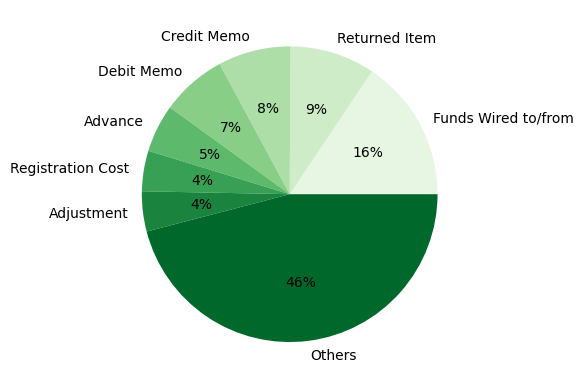

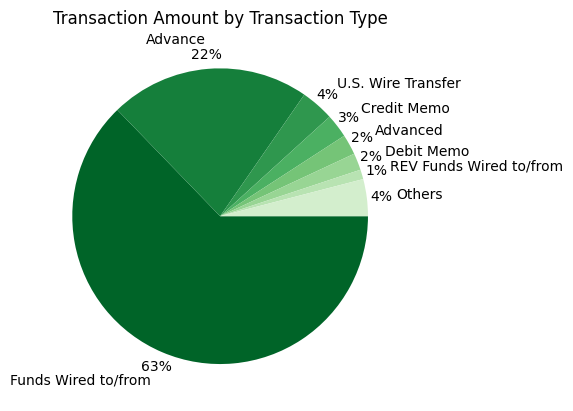

In [180]:
plt.pie(topcustomer_type['ABS_TRANSACTION_AMT'],labels=topcustomer_type['TRANSACTION_DECRIPTION'],counterclock=True,autopct='%1.0f%%',colors=colors1)
plt.show()
plt.pie(topcustomer_type_amt['ABS_TRANSACTION_AMT'],labels=topcustomer_type_amt['TRANSACTION_DECRIPTION'],counterclock=False,autopct='%1.0f%%',pctdistance=1.1,labeldistance=1.2,colors=colors2)
plt.title("Transaction Amount by Transaction Type")
plt.show()

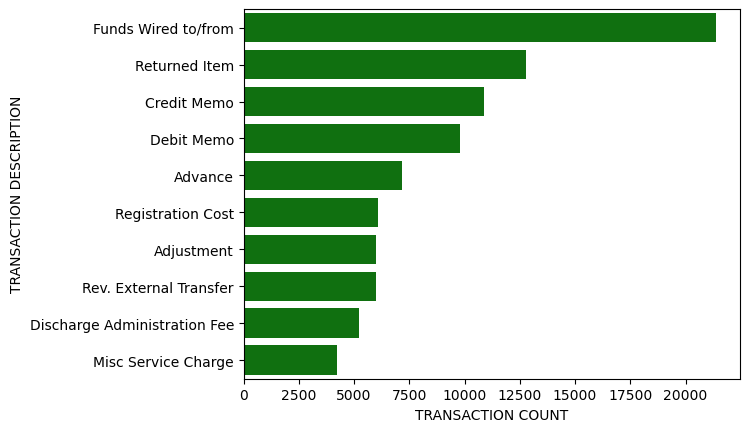

In [176]:
topcustomer_type=df.groupby('TRANSACTION_DECRIPTION')['ABS_TRANSACTION_AMT'].count().sort_values(ascending=False).reset_index()
topcustomer_type_rank=topcustomer_type.head(10)
sns.barplot(data=topcustomer_type_rank,x="ABS_TRANSACTION_AMT",y="TRANSACTION_DECRIPTION",color="green")
plt.xlabel("TRANSACTION COUNT")
plt.ylabel("TRANSACTION DESCRIPTION")
plt.show()

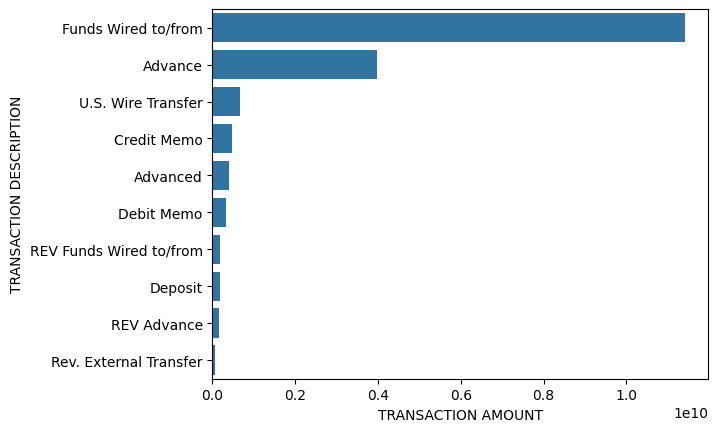

In [45]:
sns.barplot(data=topcustomer_typea_rank,x="ABS_TRANSACTION_AMT",y="TRANSACTION_DECRIPTION")
plt.xlabel("TRANSACTION AMOUNT")
plt.ylabel("TRANSACTION DESCRIPTION")
plt.show()

In [46]:
topcustomer_code=df.groupby('TRANSACTION_CODE')['ABS_TRANSACTION_AMT'].count().reset_index()
topcustomer_code_amt=df.groupby('TRANSACTION_CODE')['ABS_TRANSACTION_AMT'].sum().reset_index()

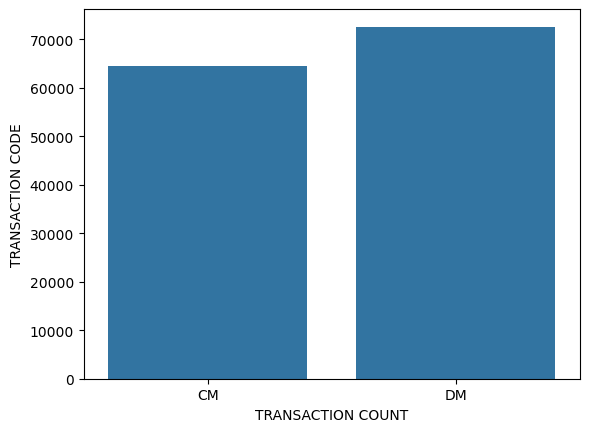

In [48]:
sns.barplot(data=topcustomer_code,x="TRANSACTION_CODE",y="ABS_TRANSACTION_AMT")
plt.xlabel("TRANSACTION COUNT")
plt.ylabel("TRANSACTION CODE")
plt.show()

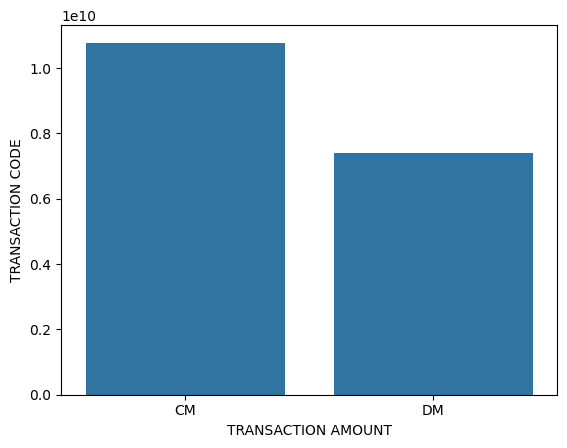

In [49]:
sns.barplot(data=topcustomer_code_amt,x="TRANSACTION_CODE",y="ABS_TRANSACTION_AMT")
plt.xlabel("TRANSACTION AMOUNT")
plt.ylabel("TRANSACTION CODE")
plt.show()

<h3> Visual # 4 Transaction per Month

In [14]:
df['Month-Year']=df['EFFECTIVE_DATE'].dt.to_period('M').astype(str)

In [15]:
monthly_amt=df.groupby(['Month-Year'])['ABS_TRANSACTION_AMT'].mean().reset_index()
monthly_count=df.groupby(['Month-Year'])['ABS_TRANSACTION_AMT'].count().reset_index()

In [25]:
monthly_amt.head(10)
monthly_amt.loc[5,'ABS_TRANSACTION_AMT']/monthly_amt.loc[4,'ABS_TRANSACTION_AMT']*100-100


78.63107513216292

In [26]:
monthly_count.head(10)

,Month-Year,ABS_TRANSACTION_AMT
0,2019-10,12076
1,2019-11,12110
2,2019-12,12475
3,2020-01,11627
4,2020-02,11926
5,2020-03,11101
6,2020-04,10878
7,2020-05,10396
8,2020-06,10991
9,2020-07,11372


Text(0, 0.5, 'Average Transaction Amount')

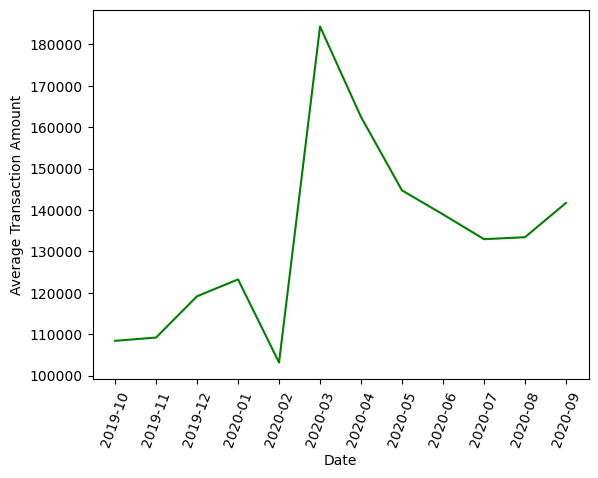

In [16]:
plt.xticks(rotation=70)
plt.plot(monthly_amt['Month-Year'],monthly_amt['ABS_TRANSACTION_AMT'],color="green")
plt.xlabel("Date")
plt.ylabel("Average Transaction Amount")

Text(0, 0.5, 'Number of Transactions per Month')

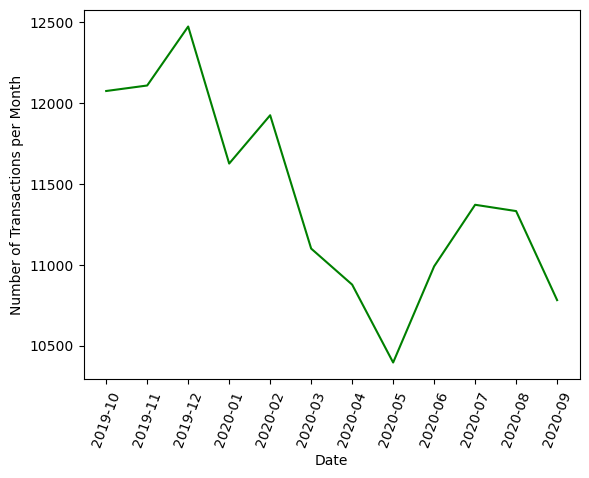

In [16]:
plt.xticks(rotation=70)
plt.plot(monthly_count['Month-Year'],monthly_count['ABS_TRANSACTION_AMT'],color="green")
plt.xlabel("Date")
plt.ylabel("Number of Transactions per Month")

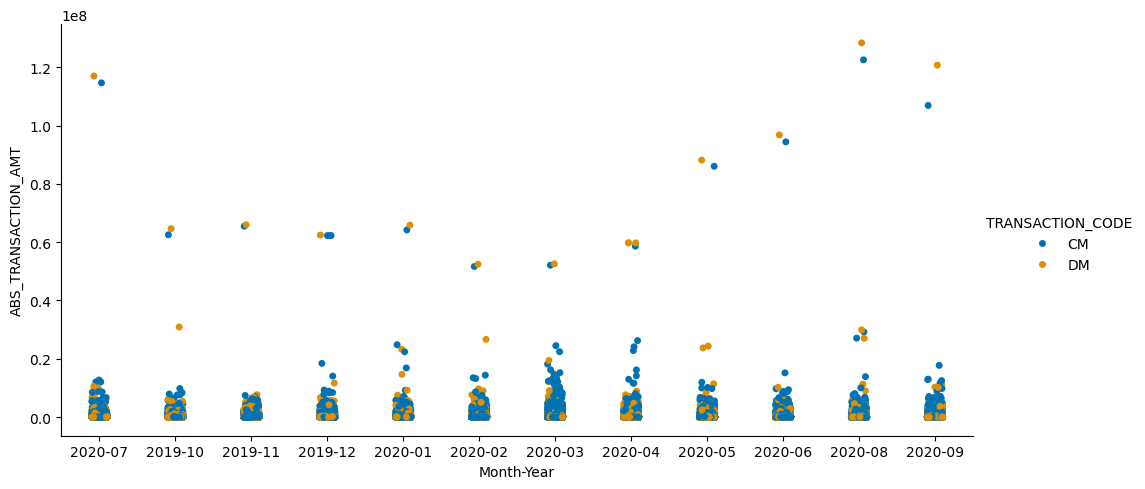

In [35]:
sns.set_palette("colorblind")
sns.catplot(x="Month-Year", y="ABS_TRANSACTION_AMT", hue="TRANSACTION_CODE", data=df, aspect = 2)

In [38]:
#no of transactions per client
transaction_count=df.groupby(['CIF','Month-Year'])['ABS_TRANSACTION_AMT'].count().sort_values(ascending=False).reset_index()
transaction_amt=df.groupby(['CIF','Month-Year'])['ABS_TRANSACTION_AMT'].mean().sort_values(ascending=False).reset_index()
transaction_amt.head(10)

,CIF,Month-Year,ABS_TRANSACTION_AMT
0,2579581,2020-01,23281688.08
1,2521514,2020-07,18428457.03
2,2521514,2020-08,17934583.71
3,2521514,2020-09,16987607.40
4,2521514,2019-12,15125677.01
5,2521514,2020-05,15103717.04
6,2521514,2020-04,14408939.14
7,2521514,2020-06,13178431.60
8,2521514,2019-11,11468149.20
9,2521514,2019-10,10238361.69


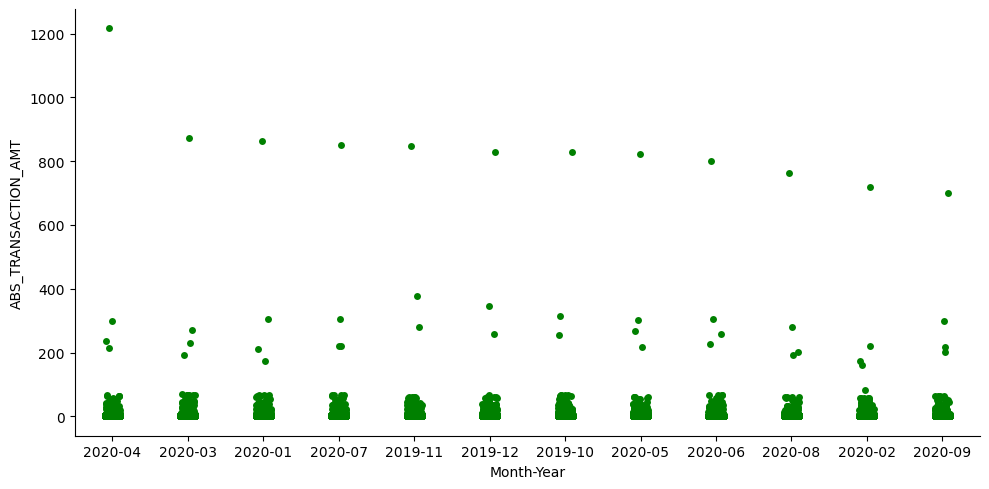

In [40]:
sns.catplot(x="Month-Year", y="ABS_TRANSACTION_AMT", data=transaction_count, aspect = 2,color="green")

In [37]:
transaction_count.head(20)

,CIF,Month-Year,ABS_TRANSACTION_AMT
0,2055038,2020-04,1216
1,2055038,2020-03,873
2,2055038,2020-01,864
3,2055038,2020-07,851
4,2055038,2019-11,846
5,2055038,2019-12,830
6,2055038,2019-10,828
7,2055038,2020-05,823
8,2055038,2020-06,800
9,2055038,2020-08,762


<h1> Queries

<h3> No. of Single Transactions > $10,000

In [55]:
df['EFFECTIVE_DATE'] = df['EFFECTIVE_DATE'].dt.strftime('%d-%m-%Y')
df['TIME_SEQ'] = df['TIME_SEQ'].dt.strftime('%H:%M:%S')

In [56]:
df['TIMESTAMP']=pd.to_datetime(df['EFFECTIVE_DATE']+ ' '+ df['TIME_SEQ'])

In [189]:
df=df.sort_values(by=['CIF','TIMESTAMP']).reset_index(drop=True)

In [44]:
df1=df[df['ABS_TRANSACTION_AMT']>10000].reset_index()

In [45]:
len(df1)

42505

<h2> No. of multiple transactions > $10,000

In [46]:
df2=df[df['ABS_TRANSACTION_AMT']<=10000].reset_index(drop=True)
df2['TIME_BEFORE']=df2.groupby('CIF')['TIMESTAMP'].diff()
df2['TIME_AFTER']=df2.groupby('CIF')['TIMESTAMP'].diff(-1).abs()

<class 'KeyError'>: 'Column not found: TIMESTAMP'

In [43]:
#checking
len(df)==len(df1)+len(df2)
len(df2)

<class 'NameError'>: name 'df1' is not defined

In [194]:
m1H=(df2.groupby('CIF')['TIMESTAMP'].diff().le(pd.Timedelta(hours=24))| 
     df2.groupby('CIF')['TIMESTAMP'].diff(-1).abs().le(pd.Timedelta(hours=24)))


In [195]:
df2_24=df2[m1H].reset_index()

In [196]:
len(df2_24)

42420

In [197]:
df2_24_f=df2_24.groupby('CIF')['ABS_TRANSACTION_AMT'].sum().reset_index()

In [198]:
df2_24_10k=df2_24_f[df2_24_f['ABS_TRANSACTION_AMT']>10000]

In [202]:
df2_24_10k

,CIF,ABS_TRANSACTION_AMT
86,2003886,32000.38
102,2005041,20200.00
160,2009150,137455.69
242,2052121,21060.19
298,2055038,6128154.24
...,...,...
47275,3294865,14480.00
47370,3296189,10408.44
47561,3298773,10110.56
47586,3299047,12000.00


In [17]:
df3=df2_24[df2_24['CIF'].isin(list(df2_24_10k['CIF']))]

In [18]:
df3.tail()

,index,CIF,EFFECTIVE_DATE,TRANSACTION_AMOUNT,TRANSACTION_CODE,TRANSACTION_DECRIPTION,TIME_SEQ,ABS_TRANSACTION_AMT,TIMESTAMP,TIME_BEFORE,TIME_AFTER
42471,94362,3305731,15-Sep-20,-2000.0,DM,Returned Item,12:59:55,2000.0,2020-09-15 12:59:55,0 days 00:00:11,0 days 00:00:11
42472,94363,3305731,15-Sep-20,-2000.0,DM,Returned Item,13:00:06,2000.0,2020-09-15 13:00:06,0 days 00:00:11,0 days 00:00:12
42473,94364,3305731,15-Sep-20,-2000.0,DM,Returned Item,13:00:18,2000.0,2020-09-15 13:00:18,0 days 00:00:12,0 days 00:00:12
42474,94365,3305731,15-Sep-20,-2000.0,DM,Returned Item,13:00:30,2000.0,2020-09-15 13:00:30,0 days 00:00:12,0 days 00:00:14
42475,94366,3305731,15-Sep-20,-2000.0,DM,Returned Item,13:00:44,2000.0,2020-09-15 13:00:44,0 days 00:00:14,NaT


In [22]:
df3.info()
df3=df3.drop(['TIME_BEFORE','TIME_AFTER'],axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17042 entries, 39 to 42475
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   index                   17042 non-null  int64          
 1   CIF                     17042 non-null  category       
 2   EFFECTIVE_DATE          17042 non-null  object         
 3   TRANSACTION_AMOUNT      17042 non-null  float64        
 4   TRANSACTION_CODE        17042 non-null  object         
 5   TRANSACTION_DECRIPTION  17042 non-null  object         
 6   TIME_SEQ                17042 non-null  object         
 7   ABS_TRANSACTION_AMT     17042 non-null  float64        
 8   TIMESTAMP               17042 non-null  datetime64[ns] 
 9   TIME_BEFORE             16618 non-null  timedelta64[ns]
 10  TIME_AFTER              16659 non-null  timedelta64[ns]
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(4), timedelta64[ns](2)
memor

In [23]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17042 entries, 39 to 42475
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   17042 non-null  int64         
 1   CIF                     17042 non-null  category      
 2   EFFECTIVE_DATE          17042 non-null  object        
 3   TRANSACTION_AMOUNT      17042 non-null  float64       
 4   TRANSACTION_CODE        17042 non-null  object        
 5   TRANSACTION_DECRIPTION  17042 non-null  object        
 6   TIME_SEQ                17042 non-null  object        
 7   ABS_TRANSACTION_AMT     17042 non-null  float64       
 8   TIMESTAMP               17042 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 2.1+ MB


In [24]:
len(df1)+len(df3)

59547

In [29]:
eft_subset=pd.concat([df1,df3],ignore_index=True)

In [32]:
eft_subset=eft_subset.sort_values(by=['CIF','TIMESTAMP']).reset_index(drop=True)

In [ ]:
eft_subset.to_csv('EFT_subset.csv',index=False)